In [27]:
import pandas as pd 
import numpy as np 


import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import pwlf
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, ttest_ind

In [2]:
Observations1 = pd.read_csv(r"C:\Users\ramon\OneDrive\Desktop\Python projects\Trading\Prosperity 3\round4\data\observations_round_4_day_1.csv")
Observations2 = pd.read_csv(r"C:\Users\ramon\OneDrive\Desktop\Python projects\Trading\Prosperity 3\round4\data\observations_round_4_day_2.csv")
Observations3 = pd.read_csv(r"C:\Users\ramon\OneDrive\Desktop\Python projects\Trading\Prosperity 3\round4\data\observations_round_4_day_3.csv")

Observations1["timestamp"] = (Observations1["timestamp"]/100).astype(int)
Observations2["timestamp"] = (Observations2["timestamp"]/100 + Observations1.shape[0]).astype(int)
Observations3["timestamp"] = (Observations3["timestamp"]/100 + 2*Observations1.shape[0]).astype(int)

Observations = pd.concat([Observations1, Observations2, Observations3])
Observations.to_csv(r"C:\Users\ramon\OneDrive\Desktop\Python projects\Trading\Prosperity 3\round4\data\observations_round_4_ALL.csv", index=False)
Observations.to_excel(r"C:\Users\ramon\OneDrive\Desktop\Python projects\Trading\Prosperity 3\round4\data\observations_round_4_ALL.xlsx", index=False)


In [41]:
Prices1 = pd.read_csv(r"C:\Users\ramon\OneDrive\Desktop\Python projects\Trading\Prosperity 3\round4\data\prices_round_4_day_1.csv", sep=";")
Prices2 = pd.read_csv(r"C:\Users\ramon\OneDrive\Desktop\Python projects\Trading\Prosperity 3\round4\data\prices_round_4_day_2.csv", sep=";")
Prices3 = pd.read_csv(r"C:\Users\ramon\OneDrive\Desktop\Python projects\Trading\Prosperity 3\round4\data\prices_round_4_day_3.csv", sep=";")

n_timestamps = len(Prices1["timestamp"].unique())

Prices1["timestamp"] = (Prices1["timestamp"]/100).astype(int)
Prices2["timestamp"] = (Prices2["timestamp"]/100 + n_timestamps).astype(int)
Prices3["timestamp"] = (Prices3["timestamp"]/100 + 2*n_timestamps).astype(int)

Prices = pd.concat([Prices1, Prices2, Prices3])
Prices.to_csv(r"C:\Users\ramon\OneDrive\Desktop\Python projects\Trading\Prosperity 3\round4\data\prices_round_4_ALL.csv", index=False)
#Prices.to_excel(r"C:\Users\ramon\OneDrive\Desktop\Python projects\Trading\Prosperity 3\round4\data\prices_round_4_ALL.xlsx", index=False)

In [42]:
Prices

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,1,0,VOLCANIC_ROCK,10515.0,143.0,10514.0,57.0,NaN,NaN,10517,200,NaN,NaN,NaN,NaN,10516.0,0.0
1,1,0,PICNIC_BASKET1,58705.0,12.0,58704.0,27.0,NaN,NaN,58716,12,58717.0,27.0,NaN,NaN,58710.5,0.0
2,1,0,PICNIC_BASKET2,30252.0,12.0,30251.0,27.0,NaN,NaN,30258,39,NaN,NaN,NaN,NaN,30255.0,0.0
3,1,0,VOLCANIC_ROCK_VOUCHER_9500,1015.0,12.0,NaN,NaN,NaN,NaN,1017,12,NaN,NaN,NaN,NaN,1016.0,0.0
4,1,0,VOLCANIC_ROCK_VOUCHER_9750,766.0,12.0,NaN,NaN,NaN,NaN,767,12,NaN,NaN,NaN,NaN,766.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,3,29999,JAMS,6446.0,96.0,6445.0,175.0,NaN,NaN,6447,261,NaN,NaN,NaN,NaN,6446.5,0.0
149996,3,29999,CROISSANTS,4295.0,148.0,NaN,NaN,NaN,NaN,4296,62,4297.0,86.0,NaN,NaN,4295.5,0.0
149997,3,29999,VOLCANIC_ROCK_VOUCHER_9500,421.0,20.0,NaN,NaN,NaN,NaN,422,20,NaN,NaN,NaN,NaN,421.5,0.0
149998,3,29999,VOLCANIC_ROCK,9920.0,137.0,9919.0,69.0,NaN,NaN,9921,131,9922.0,69.0,NaN,NaN,9920.5,0.0


In [4]:
Trades1 = pd.read_csv(r"C:\Users\ramon\OneDrive\Desktop\Python projects\Trading\Prosperity 3\round4\data\trades_round_4_day_1.csv", sep = ";")
Trades2 = pd.read_csv(r"C:\Users\ramon\OneDrive\Desktop\Python projects\Trading\Prosperity 3\round4\data\trades_round_4_day_2.csv", sep = ";")
Trades3 = pd.read_csv(r"C:\Users\ramon\OneDrive\Desktop\Python projects\Trading\Prosperity 3\round4\data\trades_round_4_day_3.csv", sep = ";")

Trades1["timestamp"] = (Trades1["timestamp"]/100).astype(int)
Trades2["timestamp"] = (Trades2["timestamp"]/100 + Trades1.shape[0]).astype(int)
Trades3["timestamp"] = (Trades3["timestamp"]/100 + 2*Trades1.shape[0]).astype(int)

Trades = pd.concat([Trades1, Trades2, Trades3])
Trades.to_csv(r"C:\Users\ramon\OneDrive\Desktop\Python projects\Trading\Prosperity 3\round4\data\trades_round_4_ALL.csv", index=False)
Trades.to_excel(r"C:\Users\ramon\OneDrive\Desktop\Python projects\Trading\Prosperity 3\round4\data\trades_round_4_ALL.xlsx", index=False)


In [5]:
df = pd.read_csv(r"C:\Users\ramon\OneDrive\Desktop\Python projects\Trading\Prosperity 3\round4\data\observations_round_4_ALL.csv")

## Finding CriticalSunlightIndex (CSI)

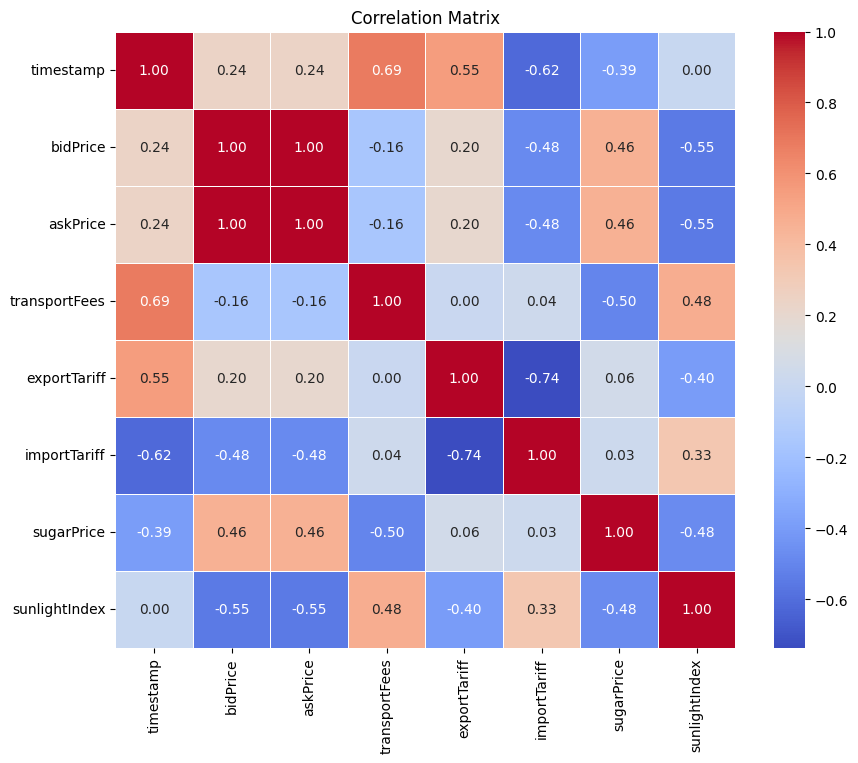

In [28]:
df = pd.read_csv(r"C:\Users\ramon\OneDrive\Desktop\Python projects\Trading\Prosperity 3\round4\data\observations_round_4_ALL.csv")

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# 2. Choose your price series; here we use sugarPrice
X = df[['sunlightIndex']].values
y = df['sugarPrice'].values

# 3. Fit a “stump” (tree with one split)
tree = DecisionTreeRegressor(max_leaf_nodes=20)
tree.fit(X, y)

# 4. Extract the threshold (CSI)
csi = tree.tree_.threshold[0]
print(f"Estimated CSI: {csi:.3f}")

Estimated CSI: 39.990


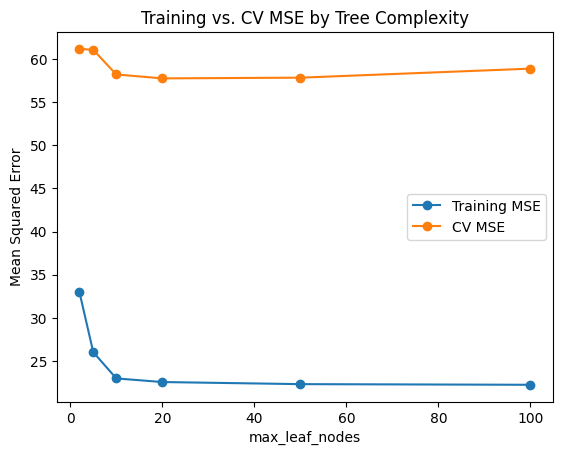

Best max_leaf_nodes: 20
Best CV MSE: 57.769
Identified split thresholds (sunlightIndex): [22.31499958 35.17499924 39.98999977 41.80500031 43.65500069 44.31500053
 44.91499901 45.00499916 50.00499916 54.99500084 55.00499916 55.84499931
 58.93499947 61.30500031 64.50500107 64.99499893 66.59499741 68.05500031
 69.52499771]


In [25]:
X = df[['sunlightIndex']].values
y = df['sugarPrice'].values

# Set up grid search over max_leaf_nodes
param_grid = {'max_leaf_nodes': [2, 5, 10, 20, 50, 100]}
tree = DecisionTreeRegressor(random_state=42)

grid = GridSearchCV(
    tree,
    param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    return_train_score=True
)
grid.fit(X, y)

# Extract results
results = grid.cv_results_
leaf_nodes = np.array([int(v) for v in results['param_max_leaf_nodes']])
mean_test_mse = -results['mean_test_score']
mean_train_mse = -results['mean_train_score']

# Plot training vs. CV MSE
plt.figure()
plt.plot(leaf_nodes, mean_train_mse, marker='o', label='Training MSE')
plt.plot(leaf_nodes, mean_test_mse, marker='o', label='CV MSE')
plt.xlabel('max_leaf_nodes')
plt.ylabel('Mean Squared Error')
plt.title('Training vs. CV MSE by Tree Complexity')
plt.legend()
plt.show()

# Best parameters and performance
best_leaves = grid.best_params_['max_leaf_nodes']
best_mse = -grid.best_score_

# Fit final tree and extract split points
best_tree = grid.best_estimator_
thresholds = best_tree.tree_.threshold[best_tree.tree_.feature >= 0]
sorted_thresholds = np.sort(thresholds)

print(f"Best max_leaf_nodes: {best_leaves}")
print(f"Best CV MSE: {best_mse:.3f}")
print("Identified split thresholds (sunlightIndex):", sorted_thresholds)

In [14]:
x = df['sunlightIndex'].values
y = df['sugarPrice'].values

my_pwlf = pwlf.PiecewiseLinFit(x, y)
# ask for exactly two line segments → one break
breaks = my_pwlf.fit(2)
csi = breaks[1]   # the breakpoint between segment 1 & 2
print("Estimated CSI:", csi)

Estimated CSI: 41.300020162339045


In [58]:
macarons_data.columns

Index(['day', 'timestamp', 'product', 'bid_price_1', 'bid_volume_1',
       'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3',
       'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2',
       'ask_price_3', 'ask_volume_3', 'mid_price', 'profit_and_loss',
       'bidPrice', 'askPrice', 'transportFees', 'exportTariff', 'importTariff',
       'sugarPrice', 'sunlightIndex', 'bid_price_best', 'ask_price_best',
       'bid_volume_best', 'ask_volume_best'],
      dtype='object')

In [64]:
market_data = pd.read_csv(r"C:\Users\ramon\OneDrive\Desktop\Python projects\Trading\Prosperity 3\round4\data\prices_round_4_ALL.csv")
df = pd.read_csv(r"C:\Users\ramon\OneDrive\Desktop\Python projects\Trading\Prosperity 3\round4\data\observations_round_4_ALL.csv")

macarons_market_data = market_data[market_data["product"] == "MAGNIFICENT_MACARONS"]
macarons_data = macarons_market_data.merge(df, on="timestamp", how="left")

macarons_data["bid_price_best"] = macarons_data[["bid_price_1", "bid_price_2", "bid_price_3"]].max(axis=1)
macarons_data["ask_price_best"] = macarons_data[["ask_price_1", "ask_price_2", "ask_price_3"]].min(axis=1)

def get_best_bid_volume(row):
    if row["bid_price_best"] == row["bid_price_1"]:
        return row["bid_volume_1"]
    elif row["bid_price_best"] == row["bid_price_2"]:
        return row["bid_volume_2"]
    elif row["bid_price_best"] == row["bid_price_3"]:
        return row["bid_volume_3"]
    return None  # Should ideally not happen

def get_best_ask_volume(row):
    if row["ask_price_best"] == row["ask_price_1"]:
        return row["ask_volume_1"]
    elif row["ask_price_best"] == row["ask_price_2"]:
        return row["ask_volume_2"]
    elif row["ask_price_best"] == row["ask_price_3"]:
        return row["ask_volume_3"]
    return None  # Should ideally not happen

def get_implied_macarons_bid(row):
    return row["bidPrice"] - row["transportFees"] - row["exportTariff"]

def get_implied_macarons_ask(row):
    return row["askPrice"] + row["transportFees"] + row["importTariff"]

macarons_data["bid_volume_best"] = macarons_data.apply(get_best_bid_volume, axis=1)
macarons_data["ask_volume_best"] = macarons_data.apply(get_best_ask_volume, axis=1)
macarons_data["implied_bid"] = macarons_data.apply(get_implied_macarons_bid, axis=1)
macarons_data["implied_ask"] = macarons_data.apply(get_implied_macarons_ask, axis=1)

macarons_data["diff_bid"] = macarons_data["implied_bid"] - macarons_data["bid_price_best"]
macarons_data["diff_ask"] = macarons_data["implied_ask"] - macarons_data["ask_price_best"]


macarons_data[['bidPrice', 'askPrice', 'transportFees', 'exportTariff', 'importTariff','implied_bid','implied_ask']]

,bidPrice,askPrice,transportFees,exportTariff,importTariff,implied_bid,implied_ask
0,627.0,628.5,1.0,9.0,-3.0,617.0,626.5
1,630.0,631.5,1.0,9.0,-3.0,620.0,629.5
2,630.0,631.5,1.0,9.0,-3.0,620.0,629.5
3,632.0,633.5,1.0,9.0,-3.0,622.0,631.5
4,630.5,632.0,1.0,9.0,-3.0,620.5,630.0
...,...,...,...,...,...,...,...
29995,797.5,799.0,1.7,9.5,-5.5,786.3,795.2
29996,801.5,803.0,1.7,9.5,-5.5,790.3,799.2
29997,804.0,805.5,1.7,9.5,-5.5,792.8,801.7
29998,798.5,800.0,1.7,9.5,-5.5,787.3,796.2


In [79]:
macarons_data["sunlightIndex"].min()

20.0

In [ ]:
bid_diffs = {}
max_diff = -9999999999999999999  # Initialize with a value smaller than any possible difference (assuming differences are non-negative)
best_i = None

for i in range(1, 71):
    x1 = macarons_data[macarons_data["sunlightIndex"] < i]["diff_bid"].mean()
    x2 = macarons_data[macarons_data["sunlightIndex"] >= i]["diff_bid"].mean()

    current_diff = abs(x1 - x2)
    bid_diffs[i] = current_diff

    if current_diff > max_diff:
        max_diff = current_diff
        best_i = i

print(f"The maximum bid difference is: {max_diff}")
print(f"This maximum difference occurred when i was: {best_i}")

C:\Users\ramon\AppData\Local\Temp\ipykernel_2432\2328421533.py:12: RuntimeWarning: invalid value encountered in greater
  if current_diff > max_diff:


The maximum bid difference is: 1.0147442337999593
This maximum difference occurred when i was: 21


In [80]:
ask_diffs = {}
max_diff = -9999999999999999999  # Initialize with a value smaller than any possible difference (assuming differences are non-negative)
best_i = None

for i in range(1, 71):
    x1 = macarons_data[macarons_data["sunlightIndex"] < i]["diff_ask"].mean()
    x2 = macarons_data[macarons_data["sunlightIndex"] >= i]["diff_ask"].mean()

    current_diff = abs(x1 - x2)
    ask_diffs[i] = current_diff

    if current_diff > max_diff:
        max_diff = current_diff
        best_i = i

print(f"The maximum ask difference is: {max_diff}")
print(f"This maximum difference occurred when i was: {best_i}")

C:\Users\ramon\AppData\Local\Temp\ipykernel_2432\242563562.py:12: RuntimeWarning: invalid value encountered in greater
  if current_diff > max_diff:


The maximum ask difference is: 1.7322473601601622
This maximum difference occurred when i was: 45


In [82]:
print(macarons_data[macarons_data["sunlightIndex"] < 45]["diff_ask"].mean())
print(macarons_data[macarons_data["sunlightIndex"] >= 45]["diff_ask"].mean())

-6.916599821746871
-5.184352461586709


In [77]:
macarons_data[macarons_data["sunlightIndex"] < 21]

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,sugarPrice,sunlightIndex,bid_price_best,ask_price_best,bid_volume_best,ask_volume_best,implied_bid,implied_ask,diff_bid,diff_ask
3956,1,3956,MAGNIFICENT_MACARONS,810.0,16.0,808.0,14.0,802.0,29.0,818,...,217.082028,20.99,810.0,818.0,16.0,8,802.5,812.0,-7.5,-6.0
3957,1,3957,MAGNIFICENT_MACARONS,809.0,18.0,807.0,17.0,801.0,23.0,817,...,216.881605,20.97,809.0,817.0,18.0,9,801.5,811.0,-7.5,-6.0
3958,1,3958,MAGNIFICENT_MACARONS,808.0,16.0,806.0,18.0,801.0,20.0,816,...,216.869211,20.94,808.0,816.0,16.0,8,801.0,810.5,-7.0,-5.5
3959,1,3959,MAGNIFICENT_MACARONS,807.0,20.0,805.0,15.0,799.0,21.0,815,...,216.949317,20.92,807.0,815.0,20.0,10,799.5,809.0,-7.5,-6.0
3960,1,3960,MAGNIFICENT_MACARONS,810.0,18.0,808.0,11.0,803.0,29.0,818,...,217.351591,20.90,810.0,818.0,18.0,9,803.0,812.5,-7.0,-5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4024,1,4024,MAGNIFICENT_MACARONS,833.0,18.0,831.0,14.0,825.0,29.0,841,...,219.238336,20.84,833.0,841.0,18.0,9,825.5,835.0,-7.5,-6.0
4025,1,4025,MAGNIFICENT_MACARONS,832.0,20.0,830.0,12.0,825.0,21.0,840,...,219.183149,20.88,832.0,840.0,20.0,10,825.0,834.5,-7.0,-5.5
4026,1,4026,MAGNIFICENT_MACARONS,830.0,16.0,828.0,17.0,822.0,27.0,838,...,219.097950,20.91,830.0,838.0,16.0,8,822.5,832.0,-7.5,-6.0
4027,1,4027,MAGNIFICENT_MACARONS,828.0,18.0,826.0,12.0,820.0,27.0,836,...,218.827416,20.94,828.0,836.0,18.0,9,820.5,830.0,-7.5,-6.0


In [78]:
print(macarons_data[macarons_data["sunlightIndex"] < 39]["diff_bid"].mean())
print(macarons_data[macarons_data["sunlightIndex"] >= 39]["diff_bid"].mean())

-7.7764960346070735
-8.425858875336381


In [70]:
print(macarons_data[macarons_data["sunlightIndex"] < 30]["diff_ask"].mean())
print(macarons_data[macarons_data["sunlightIndex"] >= 30]["diff_ask"].mean())

-5.583150684931499
-5.440013665869493
